In [7]:
import gensim
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors
from sklearn.decomposition import PCA

In [8]:
#モデルをロードする.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [29]:
#使用する単語ベクトルを取得し，そのリストを作る関数
def create_word_vector_list(word_data):
    word_vector_list = []
    words = []
    Y = []
    with open(word_data) as f:
        for pair in f:
            word1 = pair.split(',')[0].strip('\n')
            word2 = pair.split(',')[1].strip('\n')
            words.append(word1.capitalize())
            words.append(word2.capitalize())
            X1 = model.wv[word1]
            X2 = model.wv[word2]
            Y.append(X1)
            Y.append(X2)
    word_vector_list = np.array(Y)
    return word_vector_list, words

In [30]:
#単語ベクトルの取得
word_vector_list_capital, words_capital = create_word_vector_list('word_data_capital.csv')
word_vector_list_gender, words_gender = create_word_vector_list('word_data_gender.csv')
word_vector_list_teaching, words_teaching = create_word_vector_list('word_data_teaching.csv')

In [23]:
#プロットのための関数
def plot_with_pca(data, annotation):
    fig = plt.figure(figsize=(12,12))
    index = 0
    for i in range(len(data)):
        plt.scatter(data[index, 0], data[index, 1], color='red', label=annotation[index])
        plt.text(data[index, 0]+0.03, data[index, 1]+0.03, annotation[index], color='blue')
        plt.scatter(data[index+1, 0], data[index+1, 1], color='red', label=annotation[index+1])
        plt.text(data[index+1, 0]+0.03, data[index+1, 1]+0.03, annotation[index+1], color='blue')
        plt.plot([data[index, 0], data[index+1, 0]], [data[index, 1], data[index+1, 1]], color='black', linestyle='--')
        index += 2
        if index == len(data):
            break
        # plt.legend()
    plt.show()

In [33]:
#scikit-learnでPCA
sklearn_pca = PCA(n_components=2)

FinalData_capital = sklearn_pca.fit_transform(word_vector_list_capital)
FinalData_gender = sklearn_pca.fit_transform(word_vector_list_gender)
FinalData_teaching = sklearn_pca.fit_transform(word_vector_list_teaching)

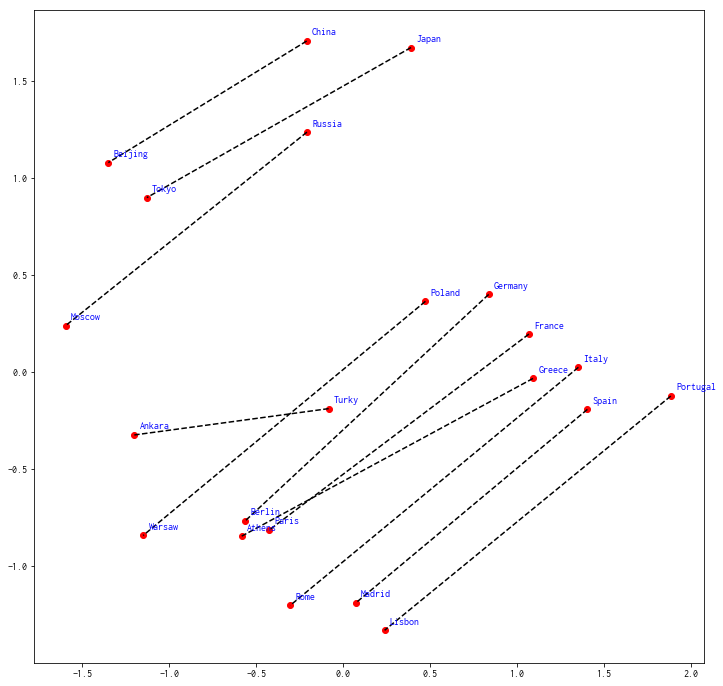

In [37]:
#国と首都
plot_with_pca(FinalData_capital, words_capital)

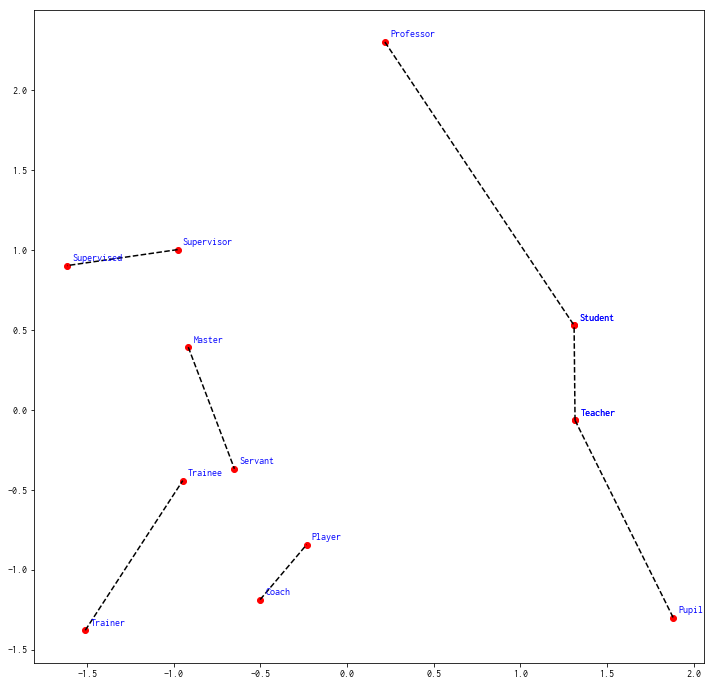

In [34]:
#教師と生徒 (?)
plot_with_pca(FinalData_teaching, words_teaching)

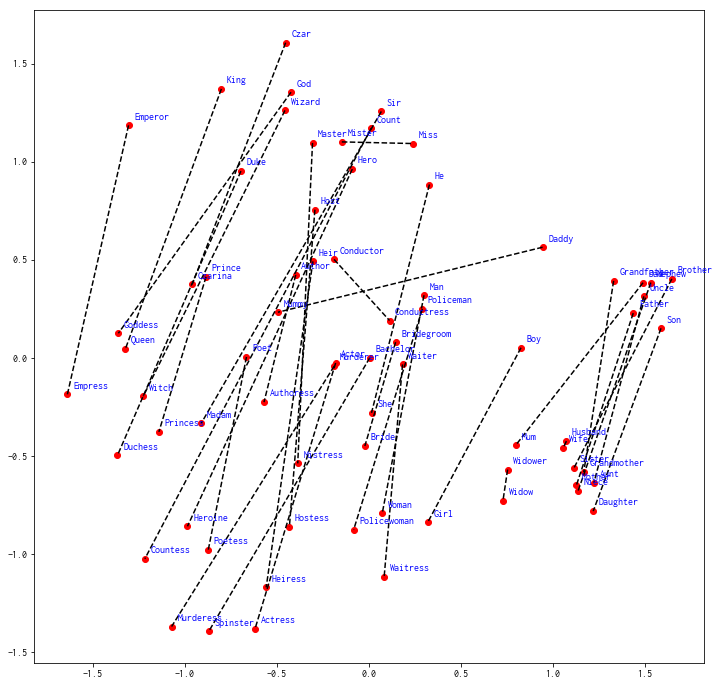

In [36]:
#男女
plot_with_pca(FinalData_gender, words_gender)